# Project 9 -- Dwijen Chawra

## Question 1

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("/anvil/projects/tdm/data/open_food_facts/openfoodfacts.tsv", sep='\t')

<ipython-input-1-d602f215cea1>:4: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("/anvil/projects/tdm/data/open_food_facts/openfoodfacts.tsv", sep='\t')


code, url, creator, created_t, created_datetime, last_modified_t, last_modified_datetime, product_name, generic_name, quantity, packaging, packaging_tags, brands, brands_tags, categories, categories_tags, categories_en, origins, origins_tags, manufacturing_places, manufacturing_places_tags, labels, labels_tags, labels_en, emb_codes, emb_codes_tags, first_packaging_code_geo, cities, cities_tags, purchase_places, stores, countries, countries_tags, countries_en, ingredients_text, allergens, allergens_en, traces, traces_tags, traces_en, serving_size, no_nutriments, additives_n, additives, additives_tags, additives_en, ingredients_from_palm_oil_n, ingredients_from_palm_oil, ingredients_from_palm_oil_tags, ingredients_that_may_be_from_palm_oil_n, ingredients_that_may_be_from_palm_oil, ingredients_that_may_be_from_palm_oil_tags, nutrition_grade_uk, nutrition_grade_fr, pnns_groups_1, pnns_groups_2, states, states_tags, states_en, main_category, main_category_en, image_url, image_small_url, ene

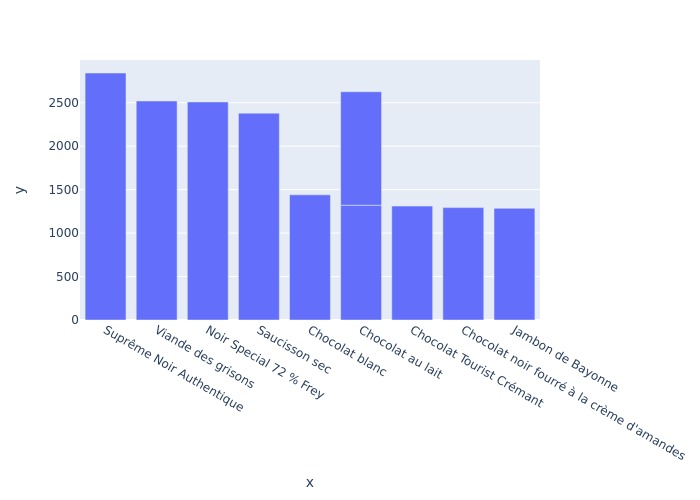

In [2]:
from pprint import pprint

for i in df.columns:
    print(i, end=", ")

import plotly.express as px

df = df.sort_values(by="carbon-footprint_100g", ascending=False)

# print(df.head(20))

fig = px.bar(x=df["product_name"][0:10], y=df["carbon-footprint_100g"][0:10])
fig.update_xaxes(tickangle=30)

fig.show(renderer="jpg")

There is a weird result, for "chocolat au lait". This is a duplicate column in the dataset and plotly has decided to plot both values on top of each other, and messing up the descending order in the graph.

## Question 2

In [3]:
restaurants = pd.read_csv("/anvil/projects/tdm/data/techcrunch/test_full.csv")


<ipython-input-3-6d34a9ceb99b>:1: DtypeWarning:

Columns (0,1,4,5,7,14,19,20,23,28,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,60,61,62,65,66) have mixed types. Specify dtype option on import or set low_memory=False.



The goal of this visualization is to see whether there is a correlation between the food preparation time and the rating.

In [4]:
for i in restaurants.columns:
    print(i, end=", ")

customer_id, gender, status_x, verified_x, created_at_x, updated_at_x, location_number, location_type, latitude_x, longitude_x, id, authentication_id, latitude_y, longitude_y, vendor_category_en, vendor_category_id, delivery_charge, serving_distance, is_open, OpeningTime, OpeningTime2, prepration_time, commission, is_akeed_delivering, discount_percentage, status_y, verified_y, rank, language, vendor_rating, sunday_from_time1, sunday_to_time1, sunday_from_time2, sunday_to_time2, monday_from_time1, monday_to_time1, monday_from_time2, monday_to_time2, tuesday_from_time1, tuesday_to_time1, tuesday_from_time2, tuesday_to_time2, wednesday_from_time1, wednesday_to_time1, wednesday_from_time2, wednesday_to_time2, thursday_from_time1, thursday_to_time1, thursday_from_time2, thursday_to_time2, friday_from_time1, friday_to_time1, friday_from_time2, friday_to_time2, saturday_from_time1, saturday_to_time1, saturday_from_time2, saturday_to_time2, primary_tags, open_close_flags, vendor_tag, vendor_ta

       vendor_rating  prepration_time
count   1.631700e+06     1.631700e+06
mean    4.350000e+00     1.403000e+01
std     2.475884e-01     4.295243e+00
min     3.200000e+00     5.000000e+00
25%     4.200000e+00     1.000000e+01
50%     4.400000e+00     1.500000e+01
75%     4.500000e+00     1.500000e+01
max     4.800000e+00     4.500000e+01
     vendor_rating  prepration_time
0              4.4             15.0
1              4.7             14.0
2              4.5             19.0
3              4.5             16.0
4              4.4             10.0
..             ...              ...
495            4.1             10.0
496            4.2             10.0
497            4.3             10.0
498            4.2             10.0
499            4.3             20.0

[500 rows x 2 columns]
start====================


/apps/spack/anvilgpu/apps/anaconda/2021.05-py38-gcc-8.4.1-vrzyh2x/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

/apps/spack/anvilgpu/apps/anaconda/2021.05-py38-gcc-8.4.1-vrzyh2x/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:7: FutureWarning:

pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



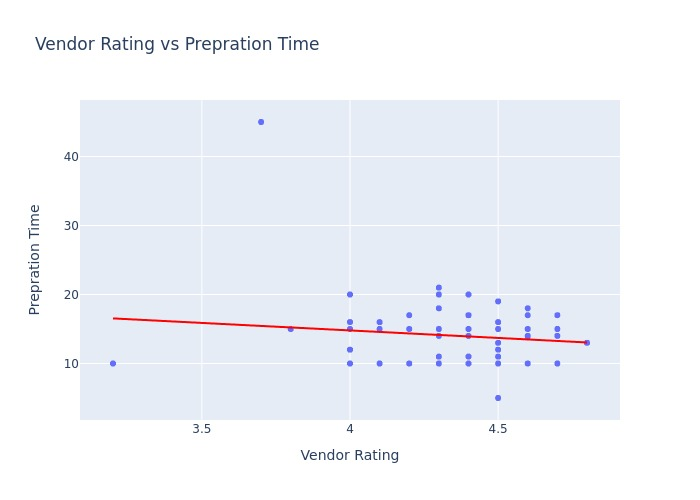

In [5]:
from tqdm import tqdm
tag_count_col = []

# make new df of prepration_time and vendor_rating
newdf = restaurants.loc[:, ["vendor_rating", "prepration_time"]]
print(newdf.describe())
print(newdf.head(500))

print("start====================")

fig = px.scatter(x=newdf["vendor_rating"], y=newdf["prepration_time"], trendline="ols", trendline_color_override="red", labels={"x": "Vendor Rating", "y": "Prepration Time"}, title="Vendor Rating vs Prepration Time")
fig.show(renderer="jpg")



This plot shows the food preparation time on the x-axis and the rating on the y-axis. There is also a trend line to show the correlation between the two variables. The trend line shows a slight negative correlation, which means that the food preparation time and the rating are inversely proportional to each other. This means that the longer the food preparation time, the lower the rating. This is a very weak correlation, and the trend line is not very accurate.

There is no visible correlation between the food preparation time and the rating.

## Question 3

id, name, brewery_id, state, country, style, availability, abv, notes, retired, 
id, name, city, state, country, notes, types, 
beer_id, username, date, text, look, smell, taste, feel, overall, score, 
            beer_id          look         smell         taste          feel  \
count  9.073128e+06  5.283110e+06  5.283110e+06  5.283110e+06  5.283110e+06   
mean   7.730655e+04  3.952155e+00  3.887863e+00  3.920704e+00  3.884350e+00   
std    7.929345e+04  5.517191e-01  6.115910e-01  6.333365e-01  5.999279e-01   
min    3.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00   
25%    1.155400e+04  3.750000e+00  3.500000e+00  3.500000e+00  3.500000e+00   
50%    5.654500e+04  4.000000e+00  4.000000e+00  4.000000e+00  4.000000e+00   
75%    1.076670e+05  4.250000e+00  4.250000e+00  4.250000e+00  4.250000e+00   
max    3.731280e+05  5.000000e+00  5.000000e+00  5.000000e+00  5.000000e+00   

            overall         score  
count  5.283110e+06  9.073128e+06  
mean   3.91628

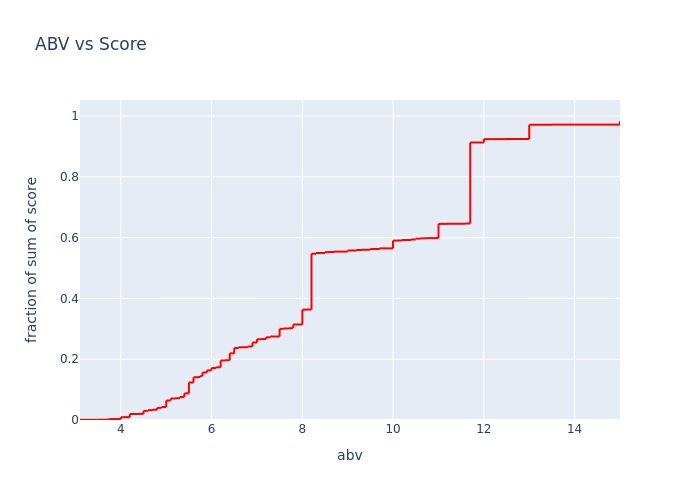

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px


# /anvil/projects/tdm/data/beer/beers.parquet  /anvil/projects/tdm/data/beer/breweries.parquet  /anvil/projects/tdm/data/beer/reviews.parquet  /anvil/projects/tdm/data/beer/reviews_sample.parquet
beersdf = pd.read_parquet("/anvil/projects/tdm/data/beer/beers.parquet")
breweriesdf = pd.read_parquet("/anvil/projects/tdm/data/beer/breweries.parquet")
reviewsdf = pd.read_parquet("/anvil/projects/tdm/data/beer/reviews.parquet")


for i in beersdf.columns:
    print(i, end=", ")
print()
for i in breweriesdf.columns:
    print(i, end=", ")
print()

for i in reviewsdf.columns:
    print(i, end=", ")
print()

print(reviewsdf.describe())

# rename the columns
breweriesdf = breweriesdf.rename(columns={"name": "brewery_name"})
beersdf = beersdf.rename(columns={"name": "beer_name"})

# add abv to reviewsdf
reviewsdf = pd.merge(reviewsdf, beersdf[["id", "abv"]], left_on="beer_id", right_on="id", how="left")
print(reviewsdf.head(10))

# fig = px.line(reviewsdf[:10000], x="abv", y=["look", "smell", "taste", "feel", "overall", "score"])
# fig = px.scatter(reviewsdf[0:10000], x="abv", y=["score"])
# fig.show(renderer="jpg")

fig = px.ecdf(reviewsdf[0:10000], x="abv", y="score", labels={"x": "ABV", "y": "Score"}, title="ABV vs Score", color_discrete_sequence=["red", "green", "blue", "yellow", "orange", "purple"])
fig.show(renderer="jpg")



The bulk of the beers have an abv of around 8.2, and another chunk have an abv around 11.8.

## Question 4

date, datetime, SACTMIN, SPOSTMIN, ride_name, 
         date             datetime  SACTMIN  SPOSTMIN            ride_name
0  01/01/2015  2015-01-01 07:47:26      NaN       5.0  kilimanjaro_safaris
1  01/01/2015  2015-01-01 07:54:23      NaN       5.0  kilimanjaro_safaris
2  01/01/2015  2015-01-01 08:05:33      NaN       5.0  kilimanjaro_safaris
3  01/01/2015  2015-01-01 08:12:23      NaN      10.0  kilimanjaro_safaris
4  01/01/2015  2015-01-01 08:19:26      NaN      10.0  kilimanjaro_safaris
5  01/01/2015  2015-01-01 08:26:23      NaN      10.0  kilimanjaro_safaris
6  01/01/2015  2015-01-01 08:32:23      NaN      10.0  kilimanjaro_safaris
7  01/01/2015  2015-01-01 08:40:24      NaN      10.0  kilimanjaro_safaris
8  01/01/2015  2015-01-01 08:47:22      NaN      10.0  kilimanjaro_safaris
9  01/01/2015  2015-01-01 08:54:25      NaN       5.0  kilimanjaro_safaris
             SACTMIN      SPOSTMIN
count  192389.000000  1.011375e+07
mean       24.847148 -9.962901e+01
std      1251.812384  3

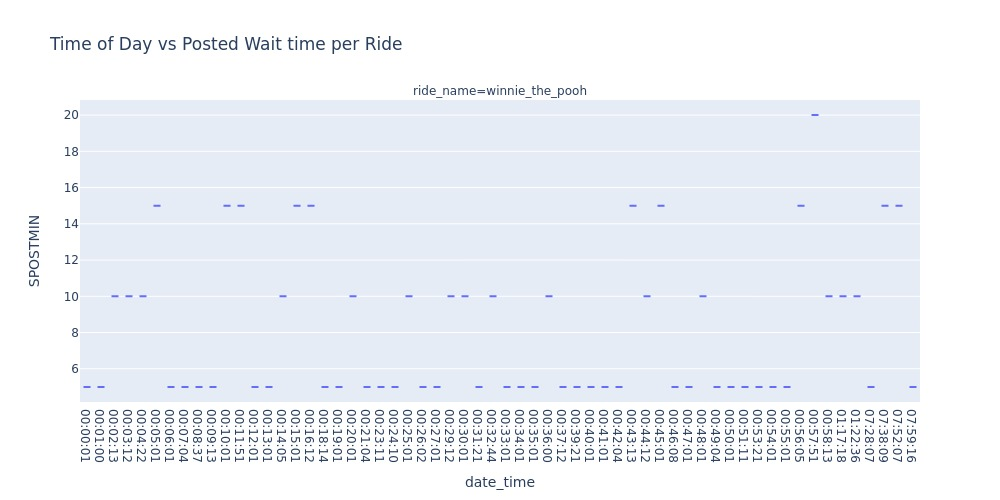

In [8]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

# /anvil/projects/tdm/data/disney/total.parquet

disneydf = pd.read_parquet("/anvil/projects/tdm/data/disney/total.parquet")

for i in disneydf.columns:
    print(i, end=", ")
print()

print(disneydf.head(10))
print(disneydf.describe())
print(len(disneydf))

# make the datetime column into a datetime object
print(disneydf.describe(include="all"))

disneydf["date_time"] = pd.to_datetime(disneydf["datetime"]).dt.time

#only ride called "winnie_the_pooh" because more than this crashed my kernel



disneydf = disneydf.loc[disneydf["ride_name"] == "winnie_the_pooh"]

finaldf = disneydf.loc[:, ["date_time", "SPOSTMIN", "ride_name", "datetime"]].sort_values(by="date_time", ascending=True)

finaldf = finaldf.loc[finaldf["SPOSTMIN"] > 0]
finaldf["minute"] = pd.to_datetime(finaldf["datetime"]).dt.minute

finaldf.drop_duplicates(subset=["minute", "ride_name"], keep="first", inplace=True)


print(finaldf.describe(include="all"))
print(finaldf.head(10))
# plot a violin plot of the time of day and SPOSTMIN
fig = px.violin(data_frame=finaldf, x="date_time", y="SPOSTMIN", facet_col="ride_name", facet_col_wrap=4, title="Time of Day vs Posted Wait time per Ride", labels={"x": "Time of Day", "y": "Posted Wait Time"}, height=500, width=1000)
# fig.update_xaxes(dtick="300000.0", tick0="00:00:00.000000", tickformat="%H:%M")
print("finished plotting and displaying now")
fig.show(renderer="jpg")
# fig.show()

Just by a rough look at this plot, this is showing us a distribution of the posted wait times at winnie_the_pooh. We can see that around midnight and the late night hours, there is a large line at the ride, and during the afternoon, there is less of a line as shown by the posted wait time.

## Question 5

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px

# /anvil/projects/tdm/data/stackoverflow/unprocessed/2021.csv

stackdf = pd.read_csv("/anvil/projects/tdm/data/stackoverflow/unprocessed/2021.csv")

for i in stackdf.columns:
    print(i, end=", ")
print()

print(stackdf.head(10))
print(stackdf.describe())

ResponseId, MainBranch, Employment, Country, US_State, UK_Country, EdLevel, Age1stCode, LearnCode, YearsCode, YearsCodePro, DevType, OrgSize, Currency, CompTotal, CompFreq, LanguageHaveWorkedWith, LanguageWantToWorkWith, DatabaseHaveWorkedWith, DatabaseWantToWorkWith, PlatformHaveWorkedWith, PlatformWantToWorkWith, WebframeHaveWorkedWith, WebframeWantToWorkWith, MiscTechHaveWorkedWith, MiscTechWantToWorkWith, ToolsTechHaveWorkedWith, ToolsTechWantToWorkWith, NEWCollabToolsHaveWorkedWith, NEWCollabToolsWantToWorkWith, OpSys, NEWStuck, NEWSOSites, SOVisitFreq, SOAccount, SOPartFreq, SOComm, NEWOtherComms, Age, Gender, Trans, Sexuality, Ethnicity, Accessibility, MentalHealth, SurveyLength, SurveyEase, ConvertedCompYearly, 
   ResponseId                                         MainBranch  \
0           1                     I am a developer by profession   
1           2             I am a student who is learning to code   
2           3  I am not primarily a developer, but I write co...  

## Pledge

By submitting this work I hereby pledge that this is my own, personal work. I've acknowledged in the designated place at the top of this file all sources that I used to complete said work, including but not limited to: online resources, books, and electronic communications. I've noted all collaboration with fellow students and/or TA's. I did not copy or plagiarize another's work.

> As a Boilermaker pursuing academic excellence, I pledge to be honest and true in all that I do. Accountable together – We are Purdue.